<a href="https://colab.research.google.com/github/ummeafruz/Machine-Learning-Sessional/blob/main/classification(task2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experiment Name: Exploring different types of Classification Algorithms

Experiment No: 02

Couse No: ETE 456

Course Name: Neural and Fuzzy Systems in Communications Sessional

Submitted By:

                  Name: Umme Afruz

                  Id: 1608011

                  Level: 4

                  Term: II


**Objectives:**
1. To get familiar with classification in machine learning.

2. To apply various classification algorithms on a real world dataset.

3. To learn about different classification algorithms.


#Stroke Prediction Dataset

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

**Attribute Information**
1. id: unique identifier
2. gender: "Male", "Female" or "Other"
3. age: age of the patient
4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6. ever_married: "No" or "Yes"
7. work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8. Residence_type: "Rural" or "Urban"
9. avg_glucose_level: average glucose level in blood
10. bmi: body mass index
11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12. stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

**Task**

Prediction of whether a patient is likely to get stroke:

In [1]:
import warnings
warnings.filterwarnings("ignore")

### Import the libraries:
Pandas is an open-source python library that is used for data manipulation and analysis. It provides many functions and methods to speed up the data analysis process. 

NumPy stands for 'Numerical Python'. It is an open-source Python library used to perform various mathematical and scientific tasks. It contains multi-dimensional arrays and matrices, along with many high-level mathematical functions that operate on these arrays and matrices.

In [2]:
import numpy as np        
import pandas as pd     
import matplotlib.pyplot as plt       

# Machine learning libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Dataset:

In [3]:
# Download the data
!wget -O stroke-data.csv https://www.dropbox.com/s/zgburk3yces5tee/healthcare-dataset-stroke-data.csv?dl=0

--2021-12-20 19:14:32--  https://www.dropbox.com/s/zgburk3yces5tee/healthcare-dataset-stroke-data.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/zgburk3yces5tee/healthcare-dataset-stroke-data.csv [following]
--2021-12-20 19:14:32--  https://www.dropbox.com/s/raw/zgburk3yces5tee/healthcare-dataset-stroke-data.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucee5bd105b652d6a3661435af03.dl.dropboxusercontent.com/cd/0/inline/BcPFhrHxYjMqEKF2-baWGUKHomtymCIihy1eUv78kgjQ39WHrmWN0WxHmqzaCHWcWZYiKe6QnpfO8Bhx8rlZr0XleXyy6_i3-VxVzqmcY2GN4mOCjiYImwPEjyjS7r0wMv2WAUpGxHWUBe5bspVswYrf/file# [following]
--2021-12-20 19:14:33--  https://ucee5bd105b652d6a3661435af03.dl.dropboxusercontent.com/cd/0/inline/BcPFhrHxYjMqEKF2-ba

## Importing the dataset 

In [4]:
dataset = pd.read_csv('stroke-data.csv')
dataset

id  gender   age  ...   bmi   smoking_status stroke
0      9046    Male  67.0  ...  36.6  formerly smoked      1
1     51676  Female  61.0  ...   NaN     never smoked      1
2     31112    Male  80.0  ...  32.5     never smoked      1
3     60182  Female  49.0  ...  34.4           smokes      1
4      1665  Female  79.0  ...  24.0     never smoked      1
...     ...     ...   ...  ...   ...              ...    ...
5105  18234  Female  80.0  ...   NaN     never smoked      0
5106  44873  Female  81.0  ...  40.0     never smoked      0
5107  19723  Female  35.0  ...  30.6     never smoked      0
5108  37544    Male  51.0  ...  25.6  formerly smoked      0
5109  44679  Female  44.0  ...  26.2          Unknown      0

[5110 rows x 12 columns]

##Pandas Profiling
Pandas profiling is an open source Python module with which we can quickly do an exploratory data analysis with just a few lines of code. 

In [5]:
!pip install pandas-profiling==2.8.0

pandas_profiling extends the pandas DataFrame with df.profile_report() for quick data analysis.

In [6]:
# # Standard Library Imports
# from pathlib import Path
# Installed packages
import pandas as pd
from ipywidgets import widgets
# Our package
from pandas_profiling import ProfileReport
#from pandas_profiling.utils.cache import cache_file

In [7]:
### To Create the Simple report quickly
profile = ProfileReport(dataset, title='Pandas Profiling Report', explorative=True)

In [8]:
# The Notebook Widgets Interface
profile.to_widgets()

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
# Or use the HTML report in an iframe
profile.to_file("output.html")

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#Klib
Klib is an open-source python library that can be used to visualize, analyze and preprocess the data easily without much effort.

In [10]:
! pip install klib

In [11]:
import klib

In [12]:
klib.corr_mat(dataset) # returns a color-encoded correlation matrix

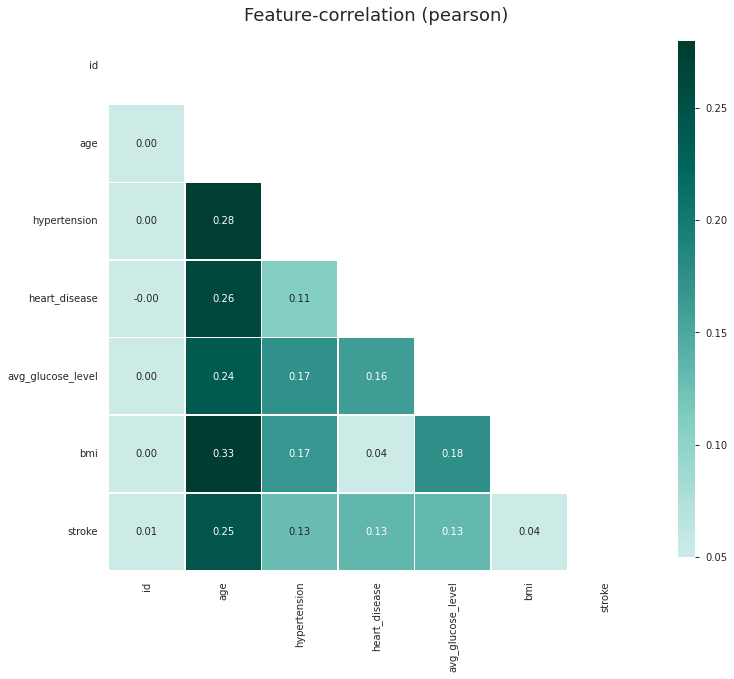

In [13]:
klib.corr_plot(dataset)

In [14]:
feature = dataset[['id','age','hypertension','heart_disease','avg_glucose_level','bmi','ever_married','work_type','smoking_status']]  # for independent
target = dataset[['stroke']]   # for dependent

In [15]:
dataset.isnull().value_counts()

id     gender  age    hypertension  heart_disease  ever_married  work_type  Residence_type  avg_glucose_level  bmi    smoking_status  stroke
False  False   False  False         False          False         False      False           False              False  False           False     4909
                                                                                                               True   False           False      201
dtype: int64

# Taking care of missing data
Here 'sklearn' means sckit learn which is a package used for machine learning model. It contains many libraries. Preprocessing is a library which contains several classes,methods. From this library we import the Imputer class which will allow us to take care of the missing data.

In [16]:
from sklearn.impute import SimpleImputer

In [19]:
imputer = SimpleImputer(missing_values=np.nan,strategy = "mean") # imputer is an object of Imputer class 
imputer = imputer.fit(feature[['bmi']]) 


In [20]:
feature[['bmi']]= imputer.transform(feature[['bmi']])


In [18]:
feature

id   age  hypertension  ...  ever_married      work_type   smoking_status
0      9046  67.0             0  ...           Yes        Private  formerly smoked
1     51676  61.0             0  ...           Yes  Self-employed     never smoked
2     31112  80.0             0  ...           Yes        Private     never smoked
3     60182  49.0             0  ...           Yes        Private           smokes
4      1665  79.0             1  ...           Yes  Self-employed     never smoked
...     ...   ...           ...  ...           ...            ...              ...
5105  18234  80.0             1  ...           Yes        Private     never smoked
5106  44873  81.0             0  ...           Yes  Self-employed     never smoked
5107  19723  35.0             0  ...           Yes  Self-employed     never smoked
5108  37544  51.0             0  ...           Yes        Private  formerly smoked
5109  44679  44.0             0  ...           Yes       Govt_job          Unknown

[5110 rows x 9 columns]

#Encoding Categorial data
Categorical variables are usually represented as ‘strings’ or ‘categories’ and are finite in number. Machine learning models require all input and output variables to be numeric. This means that if your data contains categorical data, you must encode it to numbers before you can fit and evaluate a model.

### One Hot Encoding:
One hot encoding is a process of converting categorical data variables so they can be provided to machine learning algorithms to improve predictions.One-hot encoding is essentially the representation of categorical variables as binary vectors.

In [21]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [22]:
encoder=OneHotEncoder(sparse=False)
encoded_labels = pd.DataFrame (encoder.fit_transform(feature[['ever_married','work_type','smoking_status']]))

In [23]:
encoded_labels.columns = encoder.get_feature_names(['work_type','ever_married','smoking_status'])
dataset= pd.concat([feature, encoded_labels ], axis=1)

In [24]:
dataset

id   age  ...  smoking_status_never smoked  smoking_status_smokes
0      9046  67.0  ...                          0.0                    0.0
1     51676  61.0  ...                          1.0                    0.0
2     31112  80.0  ...                          1.0                    0.0
3     60182  49.0  ...                          0.0                    1.0
4      1665  79.0  ...                          1.0                    0.0
...     ...   ...  ...                          ...                    ...
5105  18234  80.0  ...                          1.0                    0.0
5106  44873  81.0  ...                          1.0                    0.0
5107  19723  35.0  ...                          1.0                    0.0
5108  37544  51.0  ...                          0.0                    0.0
5109  44679  44.0  ...                          0.0                    0.0

[5110 rows x 20 columns]

In [25]:
dataset.columns

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'ever_married', 'work_type', 'smoking_status', 'work_type_No',
       'work_type_Yes', 'ever_married_Govt_job', 'ever_married_Never_worked',
       'ever_married_Private', 'ever_married_Self-employed',
       'ever_married_children', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

In [26]:
new_features = dataset[['id','age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi','work_type_No', 'work_type_Yes', 'ever_married_Govt_job',
       'ever_married_Never_worked', 'ever_married_Private',
       'ever_married_Self-employed', 'ever_married_children',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes']]

In [27]:
dataset

id   age  ...  smoking_status_never smoked  smoking_status_smokes
0      9046  67.0  ...                          0.0                    0.0
1     51676  61.0  ...                          1.0                    0.0
2     31112  80.0  ...                          1.0                    0.0
3     60182  49.0  ...                          0.0                    1.0
4      1665  79.0  ...                          1.0                    0.0
...     ...   ...  ...                          ...                    ...
5105  18234  80.0  ...                          1.0                    0.0
5106  44873  81.0  ...                          1.0                    0.0
5107  19723  35.0  ...                          1.0                    0.0
5108  37544  51.0  ...                          0.0                    0.0
5109  44679  44.0  ...                          0.0                    0.0

[5110 rows x 20 columns]

In [28]:
new_features

id   age  ...  smoking_status_never smoked  smoking_status_smokes
0      9046  67.0  ...                          0.0                    0.0
1     51676  61.0  ...                          1.0                    0.0
2     31112  80.0  ...                          1.0                    0.0
3     60182  49.0  ...                          0.0                    1.0
4      1665  79.0  ...                          1.0                    0.0
...     ...   ...  ...                          ...                    ...
5105  18234  80.0  ...                          1.0                    0.0
5106  44873  81.0  ...                          1.0                    0.0
5107  19723  35.0  ...                          1.0                    0.0
5108  37544  51.0  ...                          0.0                    0.0
5109  44679  44.0  ...                          0.0                    0.0

[5110 rows x 17 columns]

##Splitting the Dataset
The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model.

**Training set**—a subset to train a model.

**Test set**—a subset to test the trained model. 

In [29]:
"""Spliting the Dataset into Training Set and Test Set """

X_train,X_test,y_train,y_test=train_test_split(new_features,target,test_size = 0.2,random_state = 0)
# random_state = 0 is select to get the same result

In [30]:
print(X_train.shape)
print(X_test.shape)

(4088, 17)
(1022, 17)


In [31]:
X_test

id   age  ...  smoking_status_never smoked  smoking_status_smokes
42    61960  82.0  ...                          0.0                    1.0
380   31741   4.0  ...                          0.0                    0.0
3524  59451  58.0  ...                          1.0                    0.0
352   40670  20.0  ...                          1.0                    0.0
4927  25391  10.0  ...                          0.0                    0.0
...     ...   ...  ...                          ...                    ...
472    2953  43.0  ...                          0.0                    1.0
4446  47799  42.0  ...                          1.0                    0.0
660   61013  52.0  ...                          0.0                    0.0
57    66400  78.0  ...                          0.0                    0.0
2367   9013  35.0  ...                          0.0                    0.0

[1022 rows x 17 columns]

#Feature Scaling
Feature Scaling is a technique to standardize the independent features present in the data in a fixed range.Feature Scaling is a technique of bringing down the values of all the independent features of our dataset on the same scale. If we didn't do feature scaling then the machine learning model gives higher weightage to higher values and lower weightage to lower values.

In [32]:
from sklearn.preprocessing import StandardScaler
X_sc = StandardScaler()
y_sc = StandardScaler()
X_train_new = X_sc.fit_transform(X_train[['avg_glucose_level']])
X_test_new = X_sc.transform(X_test[['avg_glucose_level']])

#Logistic Regression
The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model.

In [33]:
from sklearn.linear_model import LogisticRegression

# Fitting Logistic Regression to the training dataset
lr = LogisticRegression()

lr.fit(X_train,y_train)

LogisticRegression()

In [34]:
# prediction
y_pred = lr.predict(X_test)

In [35]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score,precision_score,recall_score

In [36]:
# Making confusing matrix (actual,prediction)
confusion_matrix(y_test,y_pred)

array([[967,   1],
       [ 54,   0]])

In [37]:
# Making confusing matrix
# it is used to check the accuracy of the classification
print(classification_report(y_test,y_pred,target_names = ['No','Yes']))

              precision    recall  f1-score   support

          No       0.95      1.00      0.97       968
         Yes       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022



The accuracy of logistic regression is 95%.

#KNN Classifier
The abbreviation KNN stands for “K-Nearest Neighbour”. It is a supervised machine learning algorithm. The algorithm can be used to solve both classification and regression problem statements. The number of nearest neighbours to a new unknown variable that has to be predicted or classified is denoted by the symbol 'K'.

In [38]:
from sklearn.neighbors import KNeighborsClassifier

# Classifier Model
knn = KNeighborsClassifier(n_neighbors=5, metric = 'minkowski', p=2)
knn.fit(X_train,y_train)
# Prediction
y_pred = knn.predict(X_test)

In [39]:
# Making confusing matrix
print(confusion_matrix(y_test,y_pred))

[[966   2]
 [ 54   0]]


In [40]:
# Making confusing matrix
# it is used to check the accuracy of the classification
print(classification_report(y_test,y_pred,target_names = ['No','Yes']))

              precision    recall  f1-score   support

          No       0.95      1.00      0.97       968
         Yes       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022



The accuracy of KNN classifier is 95%.

#SVM
SVM or Support Vector Machine is a linear model for classification and regression problems. It can solve linear and non-linear problems and work well for many practical problems. The idea of SVM is simple. The algorithm creates a line or a hyperplane which separates the data into classes.

In [52]:
from sklearn.svm import SVC

# Classifier Model
sv = SVC(kernel = 'linear', random_state = 0)
sv.fit(X_train,y_train)
# Prediction
y_pred = sv.predict(X_test)

In [53]:
# Making confusing matrix
print(confusion_matrix(y_test,y_pred))
# Making confusing matrix
# it is used to check the accuracy of the classification
print(classification_report(y_test,y_pred,target_names = ['No','Yes']))

[[956  12]
 [ 51   3]]
              precision    recall  f1-score   support

          No       0.95      0.99      0.97       968
         Yes       0.20      0.06      0.09        54

    accuracy                           0.94      1022
   macro avg       0.57      0.52      0.53      1022
weighted avg       0.91      0.94      0.92      1022



The accuracy of SVM is 94%.

#Decision Tree
Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes.

In [54]:
from sklearn.tree import DecisionTreeClassifier
# Classifier Model
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train,y_train)
# Prediction
y_pred = classifier.predict(X_test)

In [55]:
# Making confusing matrix
print(confusion_matrix(y_test,y_pred))
# Making confusing matrix
# it is used to check the accuracy of the classification
print(classification_report(y_test,y_pred,target_names = ['No','Yes']))

[[925  43]
 [ 47   7]]
              precision    recall  f1-score   support

          No       0.95      0.96      0.95       968
         Yes       0.14      0.13      0.13        54

    accuracy                           0.91      1022
   macro avg       0.55      0.54      0.54      1022
weighted avg       0.91      0.91      0.91      1022



The accuracy of decision tree 91%.

#Random Forest
Random Forest Regression is a supervised learning algorithm that uses ensemble learning method for regression. A Random Forest operates by constructing several decision trees during training time and outputting the mean of the classes as the prediction of all the trees.

In [56]:
from sklearn.ensemble import RandomForestClassifier
# Classifier Model
classifier = RandomForestClassifier(n_estimators=10, criterion ='entropy', random_state = 0)
classifier.fit(X_train,y_train)
# Prediction
y_pred = classifier.predict(X_test)

In [57]:
# Making confusing matrix
print(confusion_matrix(y_test,y_pred))
# Making confusing matrix
# it is used to check the accuracy of the classification
print(classification_report(y_test,y_pred,target_names = ['No','Yes']))

[[965   3]
 [ 52   2]]
              precision    recall  f1-score   support

          No       0.95      1.00      0.97       968
         Yes       0.40      0.04      0.07        54

    accuracy                           0.95      1022
   macro avg       0.67      0.52      0.52      1022
weighted avg       0.92      0.95      0.92      1022



The accuracy of random forest is 95%.

#Naive Bayes
Naïve Bayes algorithm is a supervised learning algorithm, which is based on Bayes theorem and used for solving classification problems.
It is mainly used in text classification that includes a high-dimensional training dataset. It is a probabilistic classifier, which means it predicts on the basis of the probability of an object

In [58]:
from sklearn.naive_bayes import GaussianNB

# Classifier Model
classifier = GaussianNB()
classifier.fit(X_train,y_train)
# Prediction
y_pred = classifier.predict(X_test)

In [59]:
# Making confusing matrix
print(confusion_matrix(y_test,y_pred))
# Making confusing matrix
# it is used to check the accuracy of the classification
print(classification_report(y_test,y_pred,target_names = ['No','Yes']))

[[926  42]
 [ 38  16]]
              precision    recall  f1-score   support

          No       0.96      0.96      0.96       968
         Yes       0.28      0.30      0.29        54

    accuracy                           0.92      1022
   macro avg       0.62      0.63      0.62      1022
weighted avg       0.92      0.92      0.92      1022




So, Accuracy = 95% (Logistic regression)

ACccuracy = 95% (KNN classifier)

Accuracy = 94% (SVM)

Accuracy = 91% (Decision tree)

Accuracy = 95% (Random forest)

Accuracy = 92% (Naive Bayes)

 Thus, the performance of logistic regression, KNN classifier, random forest are better than other algorithms for this dataset according to the accuracy.